# 第八章 文件和数据库

## 8.1 导学

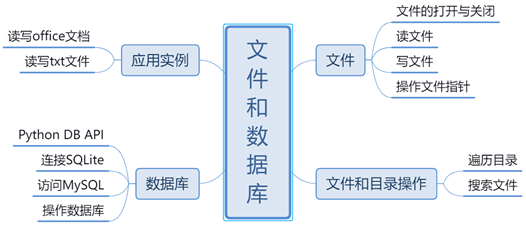

学习目标：
1.	了解文件的概念和类型
2.	掌握文件路径的表示
3.	掌握文件的常见操作
4.	了解数据库的基本概念
5.	熟悉基本SQL语句
6.	掌握SQLite数据库的操作
7.	了解MySQL数据库的操作*

重点：文件的打开与关闭

难点：文件路径，打开方式


## 8.2 文件概述

这里的文件，指的是计算机存储的文件，就是存储在某种长期储存设备上的数据。

文件通常可分为文本文件和二进制文件。  
例：用文本编辑器打开二进制文件
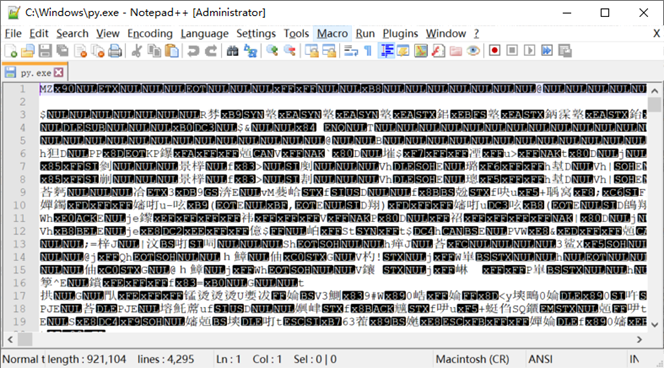

###  文件的路径

关于文件，它有两个关键属性，分别是“文件名”和“路径”。其中，文件名指的是为每个文件设定的名称，而路径则用来指明文件在计算机上的位置。  
路径：  
1)绝对路径：总是从根文件夹开始，Window 系统中以盘符（C：、D：）作为根文件夹，而 OS X 或者 Linux 系统中以 / 作为根文件夹。 例如， "C:\Windows\System32" 。  
2)相对路径：指的是文件相对于当前工作目录所在的位置。例如，当前工作目录为 "C:\Windows\System32"，若文件 demo.txt 就位于这个 System32 文件夹下，则 demo.txt 的相对路径表示为 ".\demo.txt"（其中 .\ 就表示当前所在目录）。
* 注意，编码时推荐路径写为"C:/Windows/System32/demo.txt"或者"C:\\\Windows\\\System32\\\demo.txt"

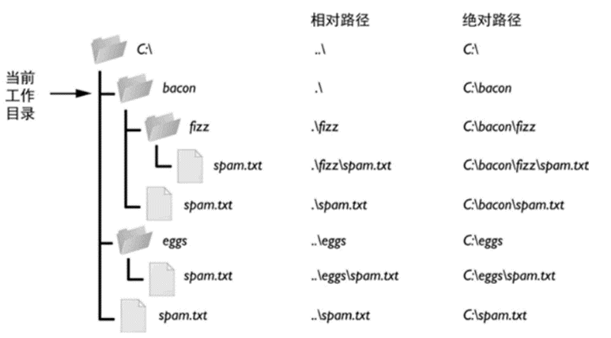

## 8.3 文件操作

### 1．打开文件 open()

内置函数open()用于创建或打开指定文件，该函数的常用语法格式如下：

file = open(file_name [, mode='r' [ , buffering=-1 [ , encoding = None ]]])


file：open()返回的文件对象。对文件的具体操作，由此对象来调用具体方法。

file_name：要创建或打开文件的文件名称。

mode：可选参数，用于指定文件的打开模式。r：只读、w：写入、a：追加；b：以二进制格式操作，默认以只读（r）模式打开文件。

buffering：可选参数，用于指定对文件做读写操作时，是否使用缓冲区。

encoding：手动设定打开文件时所使用的编码格式。

In [28]:
file = open("a.txt")
print(file) 

FileNotFoundError: [Errno 2] No such file or directory: 'ab.txt'

当以默认模式打开文件时，默认使用r权限，由于该权限要求打开的文件必须存在，因此运行此代码会报如下错误：

In [ ]:
FileNotFoundError: [Errno 2] No such file or directory: 'a.txt'

设在D盘根目录下，手动创建一个a.txt文件，并再次运行该程序，结果为：

In [ ]:
<_io.TextIOWrapper name='D:\\a.txt' mode='r' encoding='cp936'>

若读取的文件内容显示为乱码，例如某些编码格式的中文，可以在使用open()函数时，手动指定打开文件的编码格式，例如：

In [ ]:
file=open("a.txt",encoding="utf-8")

以二进制格式打开时，不能设置encoding参数，否则程序会抛出ValueError异常

In [ ]:
ValueError: binary mode doesn't take an encoding argument

通过文件对象的属性，可获取当前打开文件的部分信息：  
* file.name：返回文件的名称；
* file.mode：返回打开文件时，采用的文件打开模式；
* file.encoding：返回打开文件时使用的编码格式；
* file.closed：判断文件是否己经关闭。

In [ ]:
# 以默认方式打开文件
f = open('my_file.txt')
# 输出文件是否已经关闭
print(f.closed)
# 输出访问模式
print(f.mode)
#输出编码格式
print(f.encoding)
# 输出文件名
print(f.name)

* open()函数支持的文件打开模式如下所示：

r：只读模式打开文件，读文件内容的指针会放在文件的开头。

rb：以二进制格式、采用只读模式打开文件，读文件内容的指针位于文件的开头，一般用于非文本文件，如图片文件、音频文件等。

r+：打开文件后，既可以从头读取文件内容，也可以从开头向文件中写入新的内容，写入的新内容会覆盖文件中等长度的原有内容。

rb+：以二进制格式、采用读写模式打开文件，读写文件的指针会放在文件的开头，通常针对非文本文件（如音频文件）。

w：以只写模式打开文件，若该文件存在，打开时会清空文件中原有的内容。反之，则创建新文件。

wb：以二进制格式、只写模式打开文件，一般用于非文本文件（如音频文件）

w+：打开文件后，会对原有内容进行清空，并对该文件有读写权限。

wb+：以二进制格式、读写模式打开文件，一般用于非文本文件

a：以追加模式打开一个文件，对文件只有写入权限，如果文件已经存在，文件指针将放在文件的末尾（即新写入内容会位于已有内容之后）；反之，则会创建新文件。	

ab：以二进制格式打开文件，并采用追加模式，对文件只有写权限。如果该文件已存在，文件指针位于文件末尾（新写入文件会位于已有内容之后）；反之，则创建新文件。

a+：以读写模式打开文件；如果文件存在，文件指针放在文件的末尾（新写入文件会位于已有内容之后）；反之，则创建新文件。

ab+：以二进制模式打开文件，并采用追加模式，对文件具有读写权限，如果文件存在，则文件指针位于文件的末尾（新写入文件会位于已有内容之后）；反之，则创建新文件。


In [4]:
testfile = open('aa.txt',mode='w')


### 2.关闭文件

对于使用open()函数打开的文件，应该用close()函数将其关闭。

其语法格式很简单，如下所示：  
file.close() 


如果没有关闭打开的文件，会影响到其他程序或代码对该文件的操作。

In [29]:
import os#operating system
f = open("my_file.txt",'w')
os.remove("my_file.txt")   #删除文件

PermissionError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'my_file.txt'

如果运行此程序，Python解释器会报如下错误：

PermissionError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'my_file.txt'

正确的程序：

In [30]:
import os
f = open("my_file.txt",'w')
f.close()
os.remove("my_file.txt")

如果不调用close()函数关闭已打开的文件，不影响当前程序读取文件的操作，但会导致write()或者writeline()函数向文件中写数据时，写入操作无效。例如：

In [31]:
f = open("my_file.txt", 'w')
f.write("http://www.nuist.edu.cn/")

24

打开my_file.txt文件会发现，字符串没有写入文件。这是因为，在向以文本格式（而不是二进制格式）打开的文件中写入数据时，Python出于效率的考虑，会先将数据临时存储到缓冲区中，只有使用close()函数关闭文件时，才会将缓冲区中的数据真正写入文件中。

若需要将数据成功写入到文件中，但并不想关闭文件，调用flush()函数即可，例如：

In [32]:
f = open("my_file.txt", 'w')
f.write("Hello")
f.flush()

* 用with语句自动关闭文件

使用with ... as语句操作上下文管理器（context manager），它能够帮助自动分配并且释放资源。  

例如，使用with as操作已经打开的文件对象（本身就是上下文管理器），无论期间是否抛出异常，都能保证with as语句执行完毕后自动关闭已经打开的文件。  with as语句的基本语法格式为：  

with 表达式 [as target]：  

    代码块  
    



In [5]:
with open('my_file.txt', 'a') as f:
    f.write("Hello_NUIST")

### 3. 读文件

以可读模式（包括r、r+、rb、rb+）打开的文件，可以按字节、按行读取文件中的内容。   
设文件对象为file  
基本语法格式如下：  

buff = file.read([size]) 	# 一次读全部数据，或用参数size指定读入的字节数  
line = file.readline()     # 读一行

#读多行，返回列表。可指定读入的字节数
lines = file.readlines( [byte_size] )



In [ ]:
#以 utf-8 的编码格式打开指定文件
f = open("my_file.txt",encoding = "utf-8")
#输出读取到的数据
print(f.read())
#关闭文件
f.close()

可以通过使用size参数，指定read(size)每次可读取的最大字符（或者字节）数

In [6]:
#以 utf-8 的编码格式打开指定文件
f = open("my_file.txt",encoding = "utf-8")
#输出读取到的数据
print(f.read(6))
#关闭文件
f.close()

Hello_


对于以二进制格式打开的文件，read()函数按字节读取文件中的内容。

In [ ]:
#以二进制形式打开指定文件
f=open("my_file.txt",'rb+')
#输出读取到的数据
print(f.read())
#关闭文件
f.close()

想使用read()函数成功读取文件内容，除了严格遵守read()的语法外，还要求open()函数必须以可读方式（包括r、r+、rb、rb+）打开文件。
将上面程序中open()的打开模式改为w，程序会抛出io.UnsupportedOperation异常，提示文件没有读取权限：


In [ ]:
io.UnsupportedOperation: not readable

* 编码异常  
当文件的编码与open()设定的encoding参数不一致时，将导致UnicodeDecodeError异常。

解决方案：  
（1）将open()函数中的encoding参数值修改为和目标文件相同的编码格式，或将目标文件编码格式改为和encoding参数相同。  
（2）先使用二进制模式读取文件，然后调用bytes的decode()方法，使用目标文件的编码格式，将读取到的字节串转换成可正常显示的字符串。


In [ ]:
#以二进制形式打开指定文件，该文件编码格式为 utf-8
f = open("D:\\a.txt",'rb+')
byt = f.read()
print(byt)
print("转换后：",end="")
print(byt.decode('utf-8'))
#关闭文件
f.close()

还可以使用readline()和readlines()函数。和read()函数不同，这2个函数都以“行”作为读取单位，即每次都读取目标文件中的一行。   
对于读取以文本格式打开的文件，读取一行很好理解；对于读取以二进制格式打开的文件，它们会以“\n”作为读取一行的标志。  



readline()函数用于读取文件中的一行，包含最后的换行符“\n”。此函数的基本语法格式为：  
file.readline([size])  



In [10]:
f = open("my_file.txt")
#读取一行数据
byt = f.readline()
print(byt) 
f.close()

Hello_NUIST


在逐行读取时，还可以限制最多可以读取的字符（字节）数

In [9]:
#以二进制形式打开指定文件
f = open("my_file.txt",'rb')
byt = f.readline(6)
print(byt)
f.close()

b'Hello_'


* 逐行遍历一个文件，更简洁的方法如下  
无需reandline()方法

In [ ]:
with open("a.txt",'r') as myfile:
    for line in myfile:
        print(line)
        #print(line.strip())

readlines()函数用于读取文件中的所有行，它和调用不指定size参数的read()函数类似，只不过该函数返回是一个字符串列表，其中每个元素为文件中的一行内容。  
readlines()函数的基本语法格式如下：  
file.readlines()  



In [ ]:
f = open("my_file.txt",'rb')
byt = f.readlines()
print(byt)
f.close()

* 练习1：  
编码读取指定文件的前10行并打印输出。

参考答案：

In [ ]:
with open("my_file.txt",'r') as myfile:
    count=0
    for line in myfile:
        print(line)
        count += 1
        if count>=10:
            break

* 思考：  
怎样忽略空白行？

### 4. 写文件

Python中的文件对象提供了write()函数，可以向文件中写入指定内容。该函数的语法格式如下：   
file.write(string)

注意，在使用write()向文件中写入数据时，需保证使用open()函数是以r+、w、w+、a或a+的模式打开文件，否则执行write()函数会抛出io.UnsupportedOperation错误。


In [ ]:
f = open("a.txt", 'w')    #覆盖写入
f.write("写入一行新数据")
f.close()

如果打开文件模式中包含w（写入），那么向文件中写入内容时，会先清空原文件中的内容，然后再写入新的内容。     
而如果打开文件模式中包含a（追加），则不会清空原有内容，而是将新写入的内容会添加到原内容后边。

In [ ]:
f = open("a.txt", 'a')     #追加写入
f.write("\n写入一行新数据")
f.close()

再次打开a.txt，可以看到如下内容：

In [ ]:
你好  
写入一行新数据

在写入文件完成后，一定要调用close()函数将打开的文件关闭，否则写入的内容不会保存到文件中。   
如果向文件写入数据后，不想马上关闭文件，也可以调用文件对象提供的flush()函数，它可以实现将缓冲区的数据写入文件中。


In [ ]:
f = open("a.txt", 'w')
f.write("写入一行新数据")
f.flush()

打开a.txt文件，可以看到写入的新内容：

In [ ]:
写入一行新数据

对于以二进制格式打开的文件，可以不使用缓冲区，写入的数据会直接进入磁盘文件；但对于以文本格式打开的文件，必须使用缓冲区，否则Python解释器会ValueError错误。例如：

In [ ]:
f = open("a.txt", 'w',buffering = 0)
f.write("写入一行新数据")

运行结果为：

In [ ]:
ValueError: can't have unbuffered text I/O

Python的文件对象中，不仅提供了write()函数，还提供了writelines()函数，可以实现将字符串列表写入文件中。

In [ ]:
f = open('a.txt', 'r')
n = open('b.txt','w+')
n.writelines(f.readlines())
n.close()
f.close()

如果需要换行则需要在字符串中自行加入每行的换行符

In [ ]:
n = open('b.txt','w+')
n.writelines(['Hello','Python'])
n.writelines(['\nHello\n','Python\n'])
n.close()

### 5.文件指针

 
文件指针用于标明文件读写的起始位置，标明了文件将要从文件的哪个位置开始读起。  
通过移动文件指针的位置，再借助 read() 和 write() 函数，就可以轻松实现读取文件中指定位置的数据（或者向文件中的指定位置写入数据）。

注意，当向文件中写入数据时，如果不是文件的尾部，写入位置的原有数据不会自行向后移动，新写入的数据会将文件中处于该位置的数据直接覆盖掉。  

实现对文件指针的移动，文件对象提供了 tell() 函数和 seek() 函数。tell() 函数用于判断文件指针当前所处的位置，而 seek() 函数用于移动文件指针到文件的指定位置。    
tell() 函数基本语法格式如下：     
file.tell()     
 


In [1]:
f = open("a.txt",'r')
print(f.tell())
print(f.read(3))
print(f.tell())

0
htt
3


若文件第一行为"Hello"，运行结果为：

In [ ]:
0
Hel
3

seek() 函数用于将文件指针移动至指定位置，语法格式如下：  
file.seek(offset[, whence])  

offset -- 需要移动偏移的字节数，如果是负数表示从倒数第几位开始。  
whence：可选，默认值为 0。表示要从哪个位置开始偏移；0 代表从文件开头开始算起，1 代表从当前位置开始，2 代表从文件末尾算起。


注意，当 whence值非 0 时，Python 要求文件必须要以二进制格式打开，否则会抛出 io.UnsupportedOperation 错误。

In [33]:
f = open('a.txt', 'rb')
# 判断文件指针的位置  http://c.biancheng.net(长度22)
print(f.tell())
# 读取一个字节，文件指针自动后移1个数据
print(f.read(1))
print(f.tell())
# 将文件指针从文件开头，向后移动到 5 个字符的位置
f.seek(3)
print(f.tell())
print(f.read(1))
# 将文件指针从当前位置，向后移动到 5 个字符的位置
f.seek(3, 1)
print(f.tell())
print(f.read(1))
# 将文件指针从文件结尾，向前移动到距离 10 个字符的位置
f.seek(-2, 2)#文件尾部向前偏移1
print(f.tell())
print(f.read(1))
f.close()

0
b'h'
1
3
b'p'
7
b'c'
20
b'e'


移动文件指针到文件末尾：

In [ ]:
f.seek(0,2)

#### * 讨论：如何高效率读取一个大型文件的最后几行？

* 练习2：  
编码读取指定文件的最后5行并打印输出。

参考答案：

In [ ]:
with open('a.txt', 'rb') as File:
    File.seek(0,2)         #首先移动到文件末尾
    File.seek(-50,2)  #回退到合适的位置，单位字节    
    #打印最后5行
    for row in File.readlines()[-5:]:
        print(row)
        #print(row.decode('utf-8'))
        #print(row.strip().decode('utf-8'))        

### 6.截断文件

truncate( [size] ) 方法用于从文件开始到指定位置截断文件，即保留size字节的内容，之后的内容都删除。
Python 文件 truncate() 方法用于截断文件并返回截断的字节长度。
指定长度的话，就从文件的开头开始截断指定长度，其余内容删除；不指定长度的话，就从文件开头开始截断到当前位置，其余内容删除。

（Widnows 系统下的换行符占2个字节）

In [ ]:
# 打开文件
fo = open("a.txt", "r+")
print("文件名为: ", fo.name)

line = fo.readline()
print("读取第一行: %s" % (line))
print(fo.tell())

# 截断保留31字节的字符串
print(fo.truncate(31))

# 尝试再次读取数据
line = fo.readlines()
print("读取数据: %s" % (line))

# 关闭文件
fo.close()
#注意观察close()执行后的文件内容

## 8.4 文件目录操作

### 1. 路径拼接

在 Windows 上，路径书写使用反斜杠 "\\" 作为文件夹之间的分隔符。但在 OS X 和 Linux 上，使用正斜杠 "/" 作为它们的路径分隔符。

os.path.join(path, name) 可以拼接并返回一个文件路径的字符串，包含正确的路径分隔符。

若考虑跨平台，可考虑用os.sep.join(path, name)连接目录和文件名，则无需考虑路径分隔符是‘\’，还是Linux上的'/'，该方法能根据操作系统自动判断。

In [34]:
import os
print(os.path.join('demo', 'exercise')) 

demo\exercise


运行结果：

In [ ]:
demo\exercise

如果需要创建带有文件名称的文件存储路径，os.path.join() 函数同样很有用。


In [ ]:
import os
myFiles = ['accounts.txt', 'details.csv', 'invite.docx']
for filename in myFiles:
    print(os.path.join('C:\\demo\\exercise', filename)) 

运行结果：

In [ ]:
C:\demo\exercise\accounts.txt
C:\demo\exercise\details.csv
C:\demo\exercise\invite.docx

### 2. 获取当前工作目录

每个运行在计算机上的程序，都有一个“当前工作目录”（或 cwd）。 
若没有给出文件所在的绝对路径，默认在当前工作目录下查找该文件。   

os.getcwd() 可获得当前工作路径的字符串，os.chdir()可改变目录。

In [ ]:
import os
print(os.getcwd())
os.chdir('C:\\Windows\\System')
print(os.getcwd())

如果使用 os.chdir() 修改的工作目录不存在，Python 解释器会报错


In [ ]:
import os
print(os.getcwd())
os.chdir('C:\\Windows\\System3')
print(os.getcwd())

运行结果：

In [ ]:
FileNotFoundError: [WinError 2] 系统找不到指定的文件。: 'C:\\Windows\\System3'

Python os.path 模块提供了一些函数，可以实现绝对路径和相对路径之间的转换，以及检查给定的路径是否为绝对路径

In [ ]:
import os
print(os.path.abspath('.'))
print(os.path.abspath('.\\Scripts'))
print(os.path.isabs('.'))
print(os.path.isabs(os.path.abspath('.')))
print(os.path.relpath('C:\\Windows', 'C:\\'))
print(os.path.relpath('C:\\Windows', 'C:\\spam\\eggs'))
path = 'C:\\Windows\\System32\\calc.exe'
print(os.path.basename(path))
print(os.path.dirname(path))

运行结果

In [ ]:
E:\PythonCode\PSLectures
E:\PythonCode\PSLectures\Scripts
False
True
Windows
..\..\Windows
calc.exe
C:\Windows\System32

### 3. 获取文件属性

os.path 模块还提供了一些获取指定文件属性的方法，如下所示：  
    os.path.basename(path)：获取 path 路径的基本名称，即 path 末尾到最后一个斜杠的位置之间的字符串。  
    os.path.commonprefix(list)：返回 list（多个路径）中，所有 path 共有的最长的路径。  
    os.path.exists(path)：判断 path 对应的文件是否存在，如果存在，返回 True；反之，返回 False。  
    os.path.getmtime(path)：返回文件的最近修改时间（单位为秒）。  
    os.path.getsize(path)：返回文件大小，如果文件不存在就返回错误。  
    os.path.isfile(path)：判断path参数是否为文件。  
    os.path.isdir(path)：判断path是否为目录。  
    os.path.join(path1[, path2[, ...]])：把目录和文件名合成一个路径。  
    os.path.normcase(path)：转换path 的大小写和斜杠。  
    os.path.normpath(path)：规范path 字符串形式。  
    os.path.realpath(path)：返回path 的真实路径。  
    os.path.samefile(path1, path2)：判断目录或文件是否相同。  
    os.path.sameopenfile(fp1, fp2)：判断 fp1 和 fp2 是否指向同一文件。  
    os.path.samestat(stat1, stat2)：判断 stat1 和 stat2 是否指向同一个文件。  
    os.path.split(path) ：把路径分割成 dirname 和 basename，返回一个元组。 

In [ ]:
from os import path
# 获取绝对路径
print(path.abspath("test.txt"))
# 获取共同前缀
print(path.commonprefix(['C://test.txt', 'C://a.txt']))
# 获取共同路径
print(path.commonpath(['http://www.nuist.edu.cn/python/', 'http://www.nuist.edu.cn/shell/']))
# 获取目录
print(path.dirname('C://Users//Administrator//PycharmProjects//MSS//math_package//test.txt'))
# 判断指定目录是否存在
print(path.exists('test.txt'))

运行结果为：

In [ ]:
C:\Users\Administrator\PycharmProjects\MSS\math_package\test.txt
C://
http:\www.nuist.edu.cn
C://Users//Administrator//PycharmProjects//MSS//math_package
True

### 4. 遍历目录  
os.walk(path)——遍历文件路径  
返回的一个三元组(root,dirs,files)

In [ ]:
import os
#把path目录下面的*.html更名为*.htm
path='c:/test'
for root,dirs,files in os.walk(path):
    for item in files:
        if item[-5:].upper() != '.HTML‘:  continue
        filename = os.sep.join([root,item])
        print(filename)
        file1 = filename[:-5]+'.htm'
        os.rename(filename, file1)

### 5 提取命令行参数

sys模块可提供操作系统的属性信息。  
sys.stdout sys.stdin sys.stderr 分别表示标准输入输出,错误输出的文件对象  
sys.path 提取文件搜索路径   
sys.version 获取Python解释程序的版本信息  
sys.platform 提供操作系统信息

In [ ]:
import sys
print(sys.platform)

sys.argv是一个列表类型的变量,可返回执行程序文件时的命令行参数  
注意：sys.argv[0]是程序文件自身

In [ ]:
#Python程序最后添加以下代码，并以文件形式运行
if __name__ == '__main__':
    for arg in sys.argv:
        print ('sys.argv=', arg)

* 实例：  
编写一个程序文件，用于搜索指定目录下的文件。

In [ ]:
#代码保存为文件findfile.py
#在命令行下执行示例：python findfile.py c:\windows host
import os,sys
def findfile(start, name):
    for root, dirs, files in os.walk(start):
        #print 'relpath= %s, dirs=%s, files = %s' %(relpath, dirs, files)
        for filename in files:
            if name in filename:
                full_path = os.path.join(start, relpath, filename)
                #full_path = os.sep.join([root,filename])    
                print(os.path.normpath(os.path.abspath(full_path))) #规范path字符串形式
 
if __name__ == '__main__':
    findfile(sys.argv[1], sys.argv[2])

* 练习3：  
列出指定目录下的所有指定扩展名的文件，  
例如列出所有.xlsx文件  
例如列出所有.py文件

## 8.5 读写csv文件

csv是常用的数据文件格式。 是一种文本文件，由任意数目的行组成，一行被称为一条记录，记录间以换行符分隔；每条记录由若干数据项组成，这些数据项被称为字段，字段间的分隔符通常是逗号，也可以是制表符或其他符号。
CSV格式存储文件一般采用.csv为扩展名。
CSV文件特点：
（1）读取出的数据一般为字符数据，如果要获得数值数据，需要用户进行转换。
（2）以行为单位读取数据。
（3）列之间以半角逗号或制表符分隔，通常是半角逗号。
（4）每行开头不留空格，第一行是属性，数据列之间用分隔符隔开，无空格，行之间五空行。S
Python提供了csv模块，可方便地读写、解析csv文件。

In [ ]:
#写csv文件
import csv
headers = ['ID','Price','Date','Time','Change','Volume']
rows = [('A101',39.48,'18/5/2020','10:08am',0.18,181800),
       ('s011',71.38,'18/5/2020','10:08am',-0.41,195500)]
with open('stocks.csv', 'w') as csvfile:
    f_csv = csv.writer(csvfile)
    f_csv.writerow(headers)
    f_csv.writerows(rows)

In [ ]:
#读csv文件
import csv
with open('stocks.csv', 'r' ,newline='') as csvfile:
    f_csv = csv.reader(csvfile)
    for row in f_csv:
        print(row)

* 注意， open()函数的参数newline=''用于区分换行符，对csv模块读文件时不可缺少，否则可能导致换行符解析失败

## 8.6 访问数据库

### 关系数据库

关系数据库的主要特点就是关系，所谓关系是指数据和数据之间的联系。   
关系数据库使用二维表来表示和存储关系，一个关系就是一个二维表。   
表中的行称为记录，列称为字段。一个数据库可以包含多个表。    
表中的一行称为一个记录。表中的列为记录中的数据项，称为字段。字段也称为属性或者列。    每个记录可以包含多个字段，不同记录包含相同的字段（字段的值不同）。   
可以唯一标识一个记录的字段或字段组合称为关键字。一个表可有多个关键字，其中用于标识记录的关键字称为主关键字，其他的关键字可称为候选关键字。一个表只允许有一个主关键字。   
关系数据库的基本特点包括：  
  *关系数据库中的表是二维表，表中的字段必须是不可再分的，即不允许表中表。  
  *在同一个表中不允许出现重复的记录。  
  *在同一个记录中不允许出现重复的字段。  
  *表中记录先后顺序不影响数据的性质，可以交换记录顺序。  
  *记录中字段的顺序不影响数据，可以交换字段的顺序。  


### SQL语言

In [ ]:
SQL是Structured Query Language的缩写，即结构化查询语言，它是关系数据库的标准语言。

### 1. 创建和删除数据库

创建数据库使用create database语句。例如：  
create database testdb  
这里，testdb为创建的数据库名称。如果要删除数据库使用drop database语句。例如：  
drop database testdb  


### 2. 创建表

在数据库中创建表使用create table语句，其基本格式为：   
create table 数据库名.表名(字段名1 字段数据类型(长度) ,…)


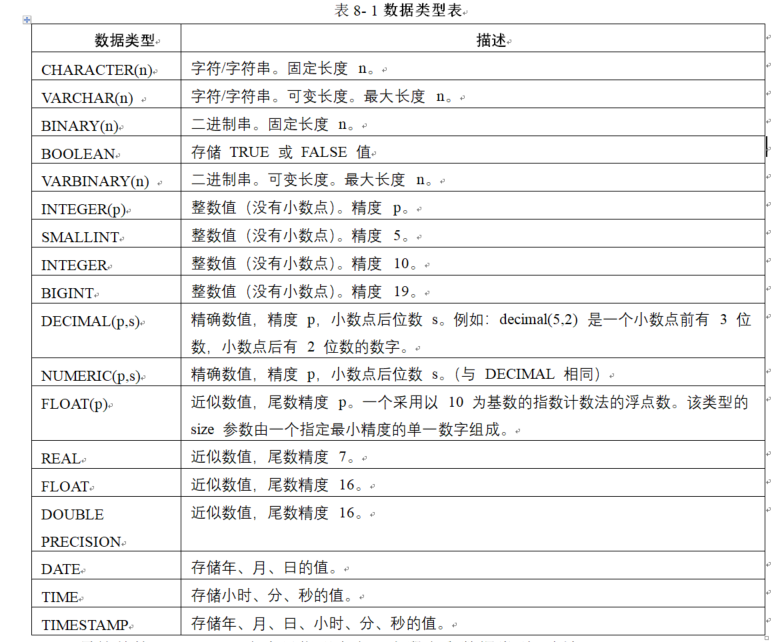

create table users(name varchar(10) ,birth date)

### 3. 修改表

修改表使用alter table语句。修改表的其他操作通常包括修改表名称、添加字段、修改字段名、修改字段数据类型和删除字段等。

### 4.删除表

删除表使用drop table语句。例如;
drop table users


### 5.删除全部记录

删除表中的全部记录使用truncate table语句。例如：
truncate table users	


### 6.执行查询

select语句用于执行查询，查询结果存储在一个表中（称为查询结果集）。  
select语句基本结构如下（SQL不区分大小写）：  
        SELECT 输出字段列表  
        FROM 表名称  
        [GROUP BY 用于分组的字段列表]  
        [WHERE 筛选条件表达式]  
        [ORDER BY 排序字段列表 [DESC|ASCE]]  
返回表中的全部字段，用星号可表示返回表中的全部字段。例如：  
select * from users 
返回表中的指定字段，在需要返回个别字段时，在输出字段列表中包含这些字段，用逗号分隔。例如：  
select name,age from users


# SQLite数据库

Python内置了一个SQLite数据库，可以直接使用，无需再安装。  
需import sqlite3  
SQLite是一款非常小巧的嵌入式开源数据库系统

### 1. SQLite接口

Python的SQL接口主要通过3个对象完成各种数据库操作：  
1）	连接对象  
2）	游标对象  
3）	SQL select查询结果  


访问数据库的基本步骤：  
1）与数据库建立连接，必要时提供账号口令  
2）创建游标对象cursor  
3）通过游标执行SQL语句，返回执行结果  
4）commit()提交事务  
5）关闭连接 

### 2. 连接SQLite数据库

访问SQLite数据库时，首先需要连接或者创建数据库  
connect()连接数据库，如果数据库不存在，则自动创建该数据库文件  
* 注意，受目录访问权限影响，数据库文件应使用绝对路径，相对路径可能导致报错OperationalError: unable to open database file

In [ ]:
import sqlite3
conn = sqlite3.connect('C:/Users/computer/Python-notebook/student.db')

完成数据库操作后，应关闭本次连接

In [ ]:
conn.close()

## 3. 数据库操作

### 建表

所有sql语句的执行都要在游标对象下进行，即需要conn.cursor()创建一个游标对象。

In [ ]:
import sqlite3
dbpath='C:/Users/computer/Python-notebook/'
conn = sqlite3.connect(dbpath+'student.db')
c = conn.cursor()  #创建一个游标
c.execute('''CREATE TABLE Student
       (id INT PRIMARY KEY     NOT NULL,
       name           char(10)  NOT NULL,
       age            INT     NOT NULL,
       address        CHAR(50),
       major          char(20));''')
conn.commit()    #提交当前的事务
#conn.close()

### 插入数据

往里面插入数据


In [ ]:
c.execute("INSERT INTO student (id,name,age,address,major) \
      VALUES (1, 'Paul', 22, 'NanJing', 'cs')")
c.execute("INSERT INTO student (id,name,age,address,major) \
      VALUES (2, 'Tom', 23, 'BeiJing', 'se')")
c.execute("INSERT INTO student (id,name,age,address,major) \
      VALUES (3, 'Alice', 19, 'ShangHai', 'ne')")
conn.commit()
conn.close()

也可以这样写：

In [ ]:
data = "1, 'Paul', 22, 'NanJing', 'cs'"
c.execute('INSERT INTO student VALUES (%s)'%data)

还可以使用占位符“？”，可以避免sql注入，比如这样：

In [ ]:
c.execute('INSERT INTO student VALUES (?,?,?,?,?)',(1, 'Paul', 22, 'NanJing', 'cs'))

还可以使用executemany()执行多条sql语句，使用executmany()比循环使用excute()执行多条sql语句效率高。

In [ ]:
c.executemany('INSERT INTO student VALUES (?,?,?,?,?)',[( 1, 'Paul', 22, 'NanJing', 'cs'),( 3, 'Alice', 19, 'ShangHai', 'ne')])

### 查询数据

接下来试着查询一下学生信息

In [ ]:
conn = sqlite3.connect(dbpath+'student.db')
c = conn.cursor()
cursor = c.execute("select * from student")
for row in cursor:
    print("student{0},name is {1},age is {2}".format(row[0], row[1], row[2]))
conn.commit()
conn.close()

输出学生的信息

In [ ]:
student1,name is Paul,age is 22
student2,name is Tom,age is 23
student3,name is Alice,age is 19

要提取查询数据，游标对象提供了fetchall()和fetchone()方法。fetchall()方法获取所有数据，返回一个二维列表。fetchone()方法获取其中一个结果，返回一个元组。

In [ ]:
res = cur.fetchall()
for line in res:
     print("fetchall",line)
cur.execute('SELECT * FROM student')
res = cur.fetchone()
print("students:",res)

注意，fetchall()调用后，游标内的结果被清除，不能再次对其调用fetchall()

### 更新数据

下面来尝试修改一些学生的信息，比如先把Tom的年龄改为24岁，那么可以使用代码如例8- 22所示：  
例8- 22 更新数据


In [ ]:
conn = sqlite3.connect(dbpath+'student.db')
c = conn.cursor()
c.execute("update student set age = 24 where name = 'Tom'")
conn.commit()
cursor = c.execute("select * from student where name = 'Tom'")
for row in cursor:
    print("student{0},name is {1},age is {2}".format(row[0], row[1], row[2]))
conn.close()

这里首先使用update语句对Tom进行了年龄更新，然后提交之后，再使用上面的查询语句来验证是否更新成功，此时程序输出：

### 删除数据

In [ ]:
conn = sqlite3.connect(dbpath+'student.db')
c = conn.cursor()
c.execute("delete from student where name = 'Tom'")
conn.commit()
cursor = c.execute("select * from student")
for row in cursor:
    print("student{0},name is {1},age is {2}".format(row[0], row[1], row[2]))
conn.close()

来看下结果：

In [ ]:
student1,name is Paul,age is 22
student3,name is Alice,age is 19

# MySQL数据库*

## 1.MySQL特点

MySQL具有以下优势：  
    1）MySQL是一个关系数据库管理系统。  
	2）MySQL是开源的，意味着可以免费使用它。  
	3）MySQL服务器是一个快速的、可靠的和易于使用的数据库服务器。  
	4）MySQL服务器工作在客户/服务器或嵌入系统中。  
	5）有大量的MySQL软件可以使用。  
 

## 2. 连接数据库

需安装pymysql等第三方模块  
连接或者操纵数据库

In [ ]:
import pymysql
#建立数据库连接
conn=pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='mysql',
    db='student',
    charset='utf8'
) 

### 3.数据库操作

### 建表

In [ ]:
import pymysql
#建立数据库连接
conn=pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='mysql',
    db='student',
    charset='utf8'
)
c = conn.cursor()
c.execute('''CREATE TABLE student
       (id INT PRIMARY KEY     NOT NULL,
       name           char(10)  NOT NULL,
       age            INT     NOT NULL,
       address        CHAR(50),
       major          char(20));''')
conn.commit()
conn.close()

### 插入数据

In [ ]:
import pymysql
#建立数据库连接
conn=pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='mysql',
    db='student',
    charset='utf8'
)
c = conn.cursor()
c.execute("INSERT INTO student (id,name,age,address,major) \
      VALUES (1, 'Paul', 22, 'NanJing', 'cs')")
c.execute("INSERT INTO student (id,name,age,address,major) \
      VALUES (2, 'Tom', 23, 'BeiJing', 'se')")
c.execute("INSERT INTO student (id,name,age,address,major) \
      VALUES (3, 'Alice', 19, 'ShangHai', 'ne')")
conn.commit()
conn.close()

这里使用游标对象执行了三个insert语句，分别插入了三个学生的信息，执行之后没有错误，表示插入成功。和Sqlite一样，也可以这样写：

In [ ]:
data = "1, 'Paul', 22, 'NanJing', 'cs'"
cur.execute('INSERT INTO student VALUES (%s)'%data)

还可以使用占位符“%s”，可以避免sql注入，比如这样

In [ ]:
cur.execute('INSERT INTO student VALUES (%s,%s,%s,%s,%s)',(1, 'Paul', 22, 'NanJing', 'cs')) 

还可以使用executemany()执行多条sql语句，使用executmany()比循环使用excute()执行多条sql语句效率高。

In [ ]:
cur.executemany('INSERT INTO student VALUES (%s,%s,%s,%s,%s)',[( 1, 'Paul', 22, 'NanJing', 'cs'),( 3, 'Alice', 19, 'ShangHai', 'ne')])

### 查询数据库

In [ ]:
import pymysql
#建立数据库连接
conn=pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='mysql',
    db='student',
    charset='utf8'
)

c = conn.cursor()
c.execute("select * from student")
cursor = c.fetchall()
for row in cursor:
    print(row)
conn.commit()
conn.close()

这里和上面一样使用了游标对象执行了select语句，查询出所有的学生，然后返回一个可迭代的游标，接下来使用for循环对每个学生信息进行遍历，输出学生的信息。结果如下：

In [ ]:
student1,name is Paul,age is 22
student2,name is Tom,age is 23
student3,name is Alice,age is 19

要提取查询数据，游标对象提供了fetchall()和fetchone()方法。fetchall()方法获取所有数据，返回一个二维列表。fetchone()方法获取其中一个结果，返回一个元组。如下所示：

In [ ]:
res = cur.fetchall()
for line in res:
        print("循环fetchall的值>>>",line)
cur.execute('SELECT * FROM student')
res = cur.fetchone()
print("取一条数据>>",res)

### 4. 更新数据

下面来尝试修改一些学生的信息，比如先把Tom的年龄改为24岁

In [ ]:
import pymysql
#建立数据库连接
conn=pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='mysql',
    db='student',
    charset='utf8'
)

c = conn.cursor()
c.execute("update student set age = 24 where name = 'Tom'")
conn.commit()
c.execute("select * from student where name = 'Tom'")
cursor = c.fetchall()
for row in cursor:
    print(row)
conn.close()

这里首先使用update语句对Tom进行了年龄更新，然后提交之后，再使用上面的查询语句来验证是否更新成功，此时程序输出：

In [ ]:
student2,name is Tom,age is 24

### 5.删除数据

最后，再来看看如何删除数据


In [ ]:
import pymysql
#建立数据库连接
conn=pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    password='mysql',
    db='student',
    charset='utf8'
)

c = conn.cursor()
c.execute("delete from student where name = 'Tom'")
conn.commit()
c.execute("select * from student")
cursor = c.fetchall()
for row in cursor:
    print(row)

conn.close()

来看下结果：

In [ ]:
student1,name is Paul,age is 22
student3,name is Alice,age is 19

## 应用实例

当前版本的问题在于每次购买的记录并不会保存，当关闭系统之后重新打开，系统将会恢复到初始状态。新版本的程序代码如下：

In [ ]:
"""
家用电器销售系统
v1.6
"""
import pymysql
from pymysql import DatabaseError


def read_config_file():
    """
    读取配置文件，获取数据库连接信息
    :return: 数据库连接信息字典
    """
    # 以 utf-8 的编码格式打开指定文件
    f = open("config.txt", encoding="utf-8")
    try:
        # 输出读取到的数据
        configs = f.readlines()
        config_lst = {}
        for i in range(len(configs)):
            line = configs[i].strip('\n')  # 去掉每行的换行符
            key = line.split('=')[0]
            value = line.split('=')[1]
            config_lst[key] = value
    finally:
        # 关闭文件
        f.close()
    return config_lst


def open_database():
    """
    根据配置文件信息，打开数据库
    :return: 数据库对象
    """
    config_lst = read_config_file()
    # 打开数据库连接
    db = pymysql.connect(
        host=config_lst['host'],
        port=int(config_lst['port']),  # port 必须是整型数据
        user=config_lst['user'],
        password=config_lst['password'],
        db=config_lst['db'],
        charset=config_lst['charset']
    )
    return db


def select_command(str_sql):
    """
    数据库查询操作
    :param str_sql: sql语句
    :return: 查询结果列表
    """
    db = open_database()
    cursor = db.cursor()
    try:
        cursor.execute(str_sql)
        return cursor.fetchall()
    except DatabaseError:
        print('无法读取数据库数据')
    finally:
        cursor.close()
        db.close()


def execute_command(str_sql):
    """
    数据库执行操作，包括增删改
    :param str_sql: sql语句
    :return: None
    """
    db = open_database()
    cursor = db.cursor()
    try:
        cursor.execute(str_sql)
        db.commit()
    except DatabaseError:
        # 发生错误时回滚
        db.rollback()
        print('数据库操作失败')
    finally:
        cursor.close()
        db.close()


def get_all_products():
    """
    获取所有的商品项
    :return: 商品项
    """
    return select_command('select * from product')


def get_all_products_in_cart():
    """
    获取所有购物车中的商品项
    :return: 购物车中的商品项
    """
    return select_command('select * from cart')


def get_product_by_id(product_id):
    """
    根据商品编号获取数据库中商品
    :param product_id: 商品编号
    :return: 商品
    """
    result = select_command('select * from product where id = ' + product_id)
    return result[0]


def update_cart(product_id, count):
    """
    更新购物车中的某项
    :param product_id:
    :param count:
    :return:
    """
    result = select_command('select * from cart where id = "' + product_id + '"')
    if len(result) == 0:  # 不存在，则添加
        execute_command('insert into cart values ("' + product_id + '",' + str(count) + ')')
    else:  # 存在，即更新此项
        count += result[0][1]
        execute_command('update cart set count = ' + str(count) + ' where id = "' + product_id + '"')


def update_product(product_id, count):
    """
    更新商品表中的某个商品数量
    :param product_id: 商品编号
    :param count: 数量
    :return: None
    """
    execute_command('update product set count = ' + str(count) + ' where id = "' + product_id + '"')


def ini_system():
    """
    初始化系统
    :return: 初始化的商品列表和购物车
    """
    print('欢迎使用家用电器销售系统！')


def input_product_id():
    """
    用户输入商品编号
    :param products: 商品列表
    :return: 商品编号
    """
    product_id = input('请输入您要购买的产品编号：')
    products = get_all_products()
    while product_id not in [item[0] for item in products]:
        product_id = input('编号不存在，请重新输入您要购买的产品编号：')
    return product_id


def input_product_count(product_id):
    """
    用户输入购买数量
    :param products: 商品列表
    :param product_id: 商品编号
    :return: 购买数量
    """
    count = int(input('请输入您要购买的产品数量：'))
    product = get_product_by_id(product_id)
    while count > product[4]:
        count = int(input('数量超出库存，请重新输入您要购买的产品数量：'))
    return count


def output_products():
    """
    显示商品信息
    :param products:商品列表
    :return: 无
    """
    print('产品和价格信息如下：')
    print('**************************************************')
    print('%-10s' % '编号', '%-10s' % '名称', '%-10s' % '品牌', '%-10s' % '价格', '%-10s' % '库存数量')
    print('-------------------------------------------------')

    for row in get_all_products():
        print('%-10s' % row[0], '%-10s' % row[1],
              '%-10s' % row[2],
              '%10.2f' % row[3], '%10d' % row[4])
    print('-------------------------------------------------')


def output_products_cart():
    """
    显示购物车信息
    :param products_cart:购物车列表
    :return: 无
    """
    print('购物车信息如下：')
    print('***************************')
    print('%-10s' % '编号', '%-10s' % '购买数量')
    print('---------------------------')
    for row in get_all_products_in_cart():
        print('%-10s' % row[0], '%-6s' % row[1])
    print('---------------------------')


def get_products_amount():
    """
    计算所购商品金额
    :param products: 商品列表
    :param products_cart: 购物车
    :return: 购买金额
    """
    amount = 0
    products_cart = get_all_products_in_cart()
    for i in range(len(products_cart)):
        product = get_product_by_id(products_cart[i][0])
        price = product[3]
        count = products_cart[i][1]
        amount += price * count
    return amount


def buy_product():
    """
    购买商品
    :param products: 商品列表
    :param products_cart: 购物车
    :return: None
    """
    product_id = input_product_id()
    count = input_product_count(product_id)
    update_cart(product_id, count)
    update_product(product_id, count)


def calculate_discount_amount(amount):
    """
    计算折扣后金额
    :param amount: 折扣前金额
    :return: 折扣后金额
    """
    if 5000 < amount <= 10000:
        amount = amount * 0.95
    elif 10000 < amount <= 20000:
        amount = amount * 0.90
    elif amount > 20000:
        amount = amount * 0.85
    else:
        amount = amount * 1
    return amount


def exit_system(amount):
    """
    退出系统
    :param amount:
    :return:
    """
    print('购买成功，您需要支付%8.2f元' % amount)
    print('谢谢您的光临，下次再见！')


def main():
    """
    # 主函数，程序入口点
    :return: None
    """
    # 初始化系统
    ini_system()

    # 用户输入数据
    option = input('请选择您的操作：1-查看商品；2-购物；3-查看购物车；其它-结账')
    while option in ['1', '2', '3']:
        if option == '1':
            output_products()
        elif option == '2':
            buy_product()
        else:
            output_products_cart()
        option = input('操作成功！请选择您的操作：1-查看商品；2-购物；3-查看购物车；其它-结账')

    # 计算购买金额
    amount = get_products_amount()
    discount_amount = calculate_discount_amount(amount)

    # 显示购买结果
    exit_system(discount_amount)


main()

运行结果：

In [ ]:
欢迎使用家用电器销售系统！
请选择您的操作：1-查看商品；2-购物；3-查看购物车；其它-结账1
产品和价格信息如下：
**************************************************
编号         名称         品牌         价格         库存数量      
-------------------------------------------------
0001       电视机        海尔            5999.00         20
0002       冰箱         西门子           6998.00         15
0003       洗衣机        小天鹅           1999.00         10
0004       空调         格力            3900.00          0
0005       热水器        格力             688.00         30
0006       笔记本        联想            5699.00         10
0007       微波炉        苏泊尔            480.00         33
0008       投影仪        松下            1250.00         12
0009       吸尘器        飞利浦            999.00          9
-------------------------------------------------
操作成功！请选择您的操作：1-查看商品；2-购物；3-查看购物车；其它-结账2
请输入您要购买的产品编号：0002
请输入您要购买的产品数量：2
操作成功！请选择您的操作：1-查看商品；2-购物；3-查看购物车；其它-结账2
请输入您要购买的产品编号：0001
请输入您要购买的产品数量：2
操作成功！请选择您的操作：1-查看商品；2-购物；3-查看购物车；其它-结账3
购物车信息如下：
***************************
编号         购买数量      
---------------------------
0002            2
0001            2
---------------------------
操作成功！请选择您的操作：1-查看商品；2-购物；3-查看购物车；其它-结账0
购买成功，您需要支付22094.90元
谢谢您的光临，下次再见！